# Chapter 4. 신경망 학습 (Training Neural Network)

**실습문제**: 본 문서에 나오는 파이썬/넘파이 스크립트에서 None과 pass로 표시된 곳을 찾아서 적절한 코드로 대체하시오.

## 4.1 데이터에서 학습한다!

- 신경망(딥러닝)은 종단간 기계학습(end-to-end machine learning)을 가능하게 함
- 입력 데이터에서 목표한 결과(출력)를 사람의 개입 없이 얻을 수 있음

<img src="fig-4-2.png" width="800">

**훈련 데이터 (training data) vs 시험 데이터 (test data)**:

- training data : 최적의 매개변수를 찾기위한 학습용
- test data : 훈련한 신경망 모델을 평가 (모델의 범용능력을 평가)
- overfitting(과적합) : 신경망 모델이 훈련 데이터만 잘 예측(분류)하고, 시험 데이터에 대해서는 잘 못하는 경우

## 4.2 손실 함수 (Loss function)

### 4.2.1 평균 제곱 오차

한개의 데이터에 대한 손실함수:
<img src="e-4.1.png" width="250">

In [ ]:
import numpy as np
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    # one-hot encoding
np.concatenate((y.reshape(1,-1), t.reshape(1,-1)))      #np.r_[y.reshape(1,-1),t.reshape(1,-1)]

In [ ]:
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)     # 여기에 None 대신에 적절한 코드를 입력하시오.

In [ ]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    # one-hot encoding

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])      # '2'일 확률이 가장 높다고 추정함 (0.6)
mean_squared_error(y,t)

In [ ]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])      # '7'일 확률이 가장 높다고 추정함 (0.6)
mean_squared_error(y,t)

### 4.2.2 교차 엔트로피 오차

한개의 데이터에 대한 손실함수:
<img src="e-4.2.png" width="250">

In [ ]:
def cross_entropy_error(y,t):
    delta = 1e-7    # 10^(-7)
    return -np.sum(t * np.log(y+delta))      # log = log_e    # 여기에 None 대신에 적절한 코드를 입력하시오.

In [ ]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    # one-hot encoding

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])      # '2'일 확률이 가장 높다고 추정함 (0.6)
cross_entropy_error(y,t)

In [ ]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])      # '7'일 확률이 가장 높다고 추정함 (0.6)
cross_entropy_error(y,t)

### 4.2.3 미니배치 학습

N 개의 데이터에 대한 손실함수:
<img src="e-4.3.png" width="300">

미니배치(mini-batch) 학습: 전체 데이터 중에 일부만 골라 학습 (예, 60,000 장의 훈련 데이터 중에서 100장을 무작위로 뽑아서 100장만을 사용하여 학습 함)

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)    # (60000, 784)
print(t_train.shape)    # (60000, 10)

60,000 개의 훈련 데이터로부터 10개만 무작위로 골라 낼려면?

In [ ]:
np.random.choice(60000,10)      # 0 ~ 59999 사이의 정수 중에 무작위로 10개를 골라냄

np.random.choice()로부터 나온 10개의 인덱스를 이용해 x_train과 t_train으로부터 10개의 데이터를 뽑아 냄:

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
#x_batch, t_batch

### 4.2.4 배치용 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y,t):    # t가 one-hot encoding인 경우만을 가정함, t가 숫자 레이블인 경우는 교재 참조
    if y.ndim == 1:      # 데이터가 하나만 있는 경우
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y+delta)) / batch_size    # np.sum() 하나로 2차원 행렬 t와 np.log(y)의 모든 원소 간의 곱을 더함 

In [ ]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])    # one-hot encoding

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])      # '2'일 확률이 가장 높다고 추정함 (0.6)
cross_entropy_error(y,t)

## 4.3 수치 미분

전방차분:
$$ \frac{df(x)}{dx} = \lim\limits_{h \to 0} \frac{f(x+h)-f(x)}{h} $$
중앙차분:
$$ \frac{df(x)}{dx} = \lim\limits_{h \to 0} \frac{f(x+h)-f(x-h)}{2h} $$

수치미분 구현시에는 전방 차분 보다는 중앙 차분으로 하는 것이 오차를 줄일 수 있음

In [ ]:
def numerical_diff(f,x):    # 고차 함수 : 함수를 인자로 받는 함수
    h = 1e-4    # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)    

**수치미분의 예**:

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
numerical_diff(function_1, 5)

In [ ]:
numerical_diff(function_1, 10)

**편미분과 gradient**:

In [ ]:
def function_2(x):
    '''''
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
    '''''
    return x[0]**2 + x[1]**2

<img src="fig-4-8.png" width="500">

**실습문제**: 위의 그래프를 출력하는 파이썬/넘파이 스크립트를 작성하시오.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x0 = np.linspace(-3, 3, 30)     # my insert
x1 = np.linspace(-3, 3, 30)
xn = x0.shape[0]
X0, X1 = np.meshgrid(x0, x1)
y = np.zeros((len(x0),len(x1)))
X = np.zeros(2)
for i1 in range(xn):
    for i0 in range(xn):
        X[0] = X0[i1,i0]
        X[1] = X1[i1,i0]
        y[i1,i0] = function_2(X)
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.plot_surface(X0, X1, y, rstride=1, cstride=1, alpha=0.3,
                color='w', edgecolor='black')
ax.view_init(25, -115) 
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

gradient at $(x_0=3, x_1=4) : (\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$
- 모든 편미분을 벡터화 한 것

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

#def _numerical_gradient_no_batch(f, x):
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)    # x와 형상이 같고 그 원소가 모두 0인 배열을 생성함
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        #print(fxh1)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        #print(fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 값 복원

        print(x[idx], grad[idx])

    return grad

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

In [ ]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

In [ ]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

gradient를 그려보기:

<img src="fig-4-9.png" width="500">

**실습문제**: 위의 그림과 같이 gradient를 그리는 파이썬 스크립트를 작성하시오.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) 
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val          
    return grad
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    #print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

## 4.4 경사 하강법 (gradient descent)

<img src="e-4.7.png" width="200">     $\eta$: 학습률(learning rate)
    

**실습문제**: 경사 하강법으로 아래 그림과 같이 $f(x_0,x_1)=x_0^2+x_1^2$의 최솟값을 구하라.

<img src="fig-4-10.png" width="500">

In [ ]:
import numpy as np
import matplotlib.pylab as plt
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot(x_history[:,0], x_history[:,1], 'o')

x0 = np.linspace(-5, 5, 100)     
x1 = np.linspace(-5, 5, 100)
xn = x0.shape[0]
X0, X1 = np.meshgrid(x0, x1)
y = np.zeros((len(x0),len(x1)))
X = np.zeros(2)
for i1 in range(xn):
    for i0 in range(xn):
        X[0] = X0[i1,i0]
        X[1] = X1[i1,i0]
        y[i1,i0] = function_2(X)

plt.figure(1, figsize=(5, 5))
cont = plt.contour(X0, X1, y, levels=(0.25, 1, 4, 9, 16), colors='black', alpha=0.5, linestyles='dashed')    
plt.xlim(-4.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


학습률이 너무 크면:

In [ ]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
#gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

학습률이 너무 작으면:

In [ ]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
#gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

**파라미터 vs 하이퍼 파라미터**:

- 파라미터 : W, b - 학습 알고리즘에 의해서 자동 획득
- 하이퍼 파라미터 : 학습률, 반복횟수, 미니배치 크기 등 - 사람이 직접 설정

### 4.4.2 신경망에서의 기울기

<img src="e-4.8.png" width="250">

**간단한 신경망 simpleNet 구현 예:** 1 layer NN

- 입력 X = [x0,x1]
- 중간 출력 Z = [z1,z2,z3] = X*W      where W = 2x3 matrix
- 출력 Y = [y0,y1,y2]  = softmax(Z)
- 정답 T = [t0,t1,t2]      => one-hot encoding

simpleNet 클래스 정의:

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error    # common library 사용
from common.gradient import numerical_gradient        # common library 사용

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)        # 가중치 매개변수 초기화 - 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss


simpleNet 테스트:

In [ ]:
net = simpleNet()
print(net.W)    # 가중치 매개변수 출력

Prediction:

In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

In [ ]:
np.argmax(p)    # 최대값의 인덱스

Loss 계산:

In [ ]:
t = np.array([0, 0, 1])    # 정답 레이블
net.loss(x, t)

기울기(gradient) 계산:

In [ ]:
def f(W):  # 인수 W는 dummy로 만든 것?
           # net.loss() 함수는 W에 따라서 그 값이 달라짐. 따라서 f()는 W의 함수임
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)    # 고차함수 : 함수의 인자로 함수를 넘김
print(dW)

위의 함수 f를 람다 식으로 표현하면:

In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

**간단한 신경망 simpleNet 구현 예 끝:** 

- 이 예제에서는 신경망의 기울기(gradient) 까지만 구함. 
- 경사하강법에 따라 가중치 매개변수를 갱신하는 학습 알고리즘은 다음 절에서 설명함.

**실습문제**: MNIST 데이터에 대하여 1층 신경망을 구성하고 매개변수를 학습시켜서 학습시간과 정확도를 측정하시오. 머신러닝 교과서 '6장 Logistic Regression'과 본 교재 4.5절 2층 신경망 구현 내용을 참조하여 위의 simpleNet을 적절히 수정하여 구현하시오.

MNIST에 대한 OneLayerNet 클래스 정의: (머신러닝 교과서 '6장 Logistic Regression, 6.3절 2차원 입력 3클래스 분류'과 본 교재 4.5절 2층 신경망 구현 내용 참조)

Neural network configuration :
- input layer neurons: 784
- output layer neurons: 10

$$ A^{(1)} = X \cdot W^{(1)} + B^{(1)} $$

$$ \begin{pmatrix} a_1^{(1)} & \cdots & a_{10}^{(1)} \end{pmatrix} = 
   \begin{pmatrix} x_1 & \cdots & x_{784} \end{pmatrix} 
   \begin{pmatrix} w_{1,1}^{(1)} & \cdots & w_{10,1}^{(1)} \\ \vdots & \ddots & \vdots \\ w_{1,784}^{(1)} & \cdots & w_{10,784}^{(1)} \end{pmatrix}
   + \begin{pmatrix} b_1^{(1)} & \cdots & b_{10}^{(1)} \end{pmatrix} $$
   
$$ Y = softmax(A^{(1)}) $$

학습해야 할 매개변수 개수:

- W1 = 784*10, b1 = 10, Total = 7850

OneLayerNet 클래스 정의:

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error  
from common.gradient import numerical_gradient   

class OneLayerNet:
    def __init__(self, input_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, output_size)
        self.params['b1'] = np.zeros(output_size)
        
    def predict(self, x):
        W1 = self.params['W1']
        b1 = self.params['b1']    
        a1 = np.dot(x, W1) + b1
        y = softmax(a1)        
        return y        

    def loss(self, x, t):
        y = self.predict(x)
        loss = cross_entropy_error(y, t)
        return loss

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):  
        loss_W = lambda W: self.loss(x, t)        
        grads = {}
        print("Call numerical_gradient for W1\n") 
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        print("Call numerical_gradient for b1\n")    
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        return grads
        
    def gradient(self, x, t): 
        W1 = self.params['W1']
        b1 = self.params['b1']
        grads = {}
        
        batch_num = x.shape[0]        
        a1 = np.dot(x, W1) + b1
        y = softmax(a1)        
        dy = (y - t) / batch_num
        grads['W1'] = np.dot(x.T, dy)
        grads['b1'] = np.sum(dy, axis=0)
        return grads

OneLayerNet 테스트:

In [ ]:
net = OneLayerNet(input_size=784, output_size=10)
print("net.params['W1'].shape = ", net.params['W1'].shape)
print("net.params['b1'].shape = ", net.params['b1'].shape) 

Prediction:

In [ ]:
x = np.random.rand(100, 784) 
y = net.predict(x)

Gradient 계산:

In [ ]:
x = np.random.rand(100, 784)   
t = np.random.rand(100, 10)  

grads = net.numerical_gradient(x, t) 
    
print("grads['W1'].shape = ", grads['W1'].shape)  
print("grads['b1'].shape = ", grads['b1'].shape) 

print("grads['W1'] = ", grads['W1'])    
print("grads['b1'] = ", grads['b1'])    

미니배치 학습 구현하기:

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

onelayernet = OneLayerNet(input_size=784, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
    
    batch_mask = np.random.choice(train_size, batch_size)    
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = onelayernet.gradient(x_batch, t_batch)    
    
    for key in ('W1', 'b1'):
        onelayernet.params[key] -= learning_rate * grad[key]
    
    loss = onelayernet.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print("Mini-batch training Done!!!")

시험 데이터로 평가하기:

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

onelayernet = OneLayerNet(input_size=784, output_size=10)

iters_num = 10000 
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = onelayernet.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1'):
        onelayernet.params[key] -= learning_rate * grad[key]
    
    loss = onelayernet.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = onelayernet.accuracy(x_train, t_train)
        test_acc = onelayernet.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("i = " + str(i) + " | train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

눈으로 확인하기:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline  

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    imshow(np.asarray(pil_img)) 

test_size = x_test.shape[0]
test_mask = np.random.choice(test_size, 10)
print("test_mask = ", test_mask)

x = x_test[test_mask]
t = t_test[test_mask]
y = onelayernet.predict(x)

y = np.argmax(y, axis=1)
t = np.argmax(t, axis=1)

print("y =", end=" ")
for i in range(10):
    label = y[i]
    print(label, end="            ") 

print("t =", end=" ")
for i in range(10):
    label = t[i]
    print(label, end="            ") 
        
plt.figure(figsize=(15, 2))
plt.subplots_adjust(wspace=0.5, hspace=0.5) 
for i in range(10):
    plt.subplot(1, 10, i + 1)
    img = x[i]*256      
    img = img.reshape(28, 28)  
    img_show(img)
plt.show()   

## 4.5 2층 신경망에 대한 학습 알고리즘 구현하기

### <center> $w_{ij} = w_{ij} - \eta \frac{\partial L}{\partial w_{ij}}$ </center>

- 데이터를 미니배치로 무작위로 선정
- 확률적 경사 하강법 (SGD: Stochastic Gradient Descent) : 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사하강법

**신경망 학습의 절차**:

<img src="p180.jpg" width="800">

### 4.5.1 2층 신경망 클래스 구현하기

Neural network configuration :
- input layer neurons: 784
- hidden layer neurons: 50
- output layer neurons: 10

$$ A^{(1)} = X \cdot W^{(1)} + B^{(1)} $$

$$ \begin{pmatrix} a_1^{(1)} & \cdots & a_{50}^{(1)} \end{pmatrix} = 
   \begin{pmatrix} x_1 & \cdots & x_{784} \end{pmatrix} 
   \begin{pmatrix} w_{1,1}^{(1)} & \cdots & w_{50,1}^{(1)} \\ \vdots & \ddots & \vdots \\ w_{1,784}^{(1)} & \cdots & w_{50,784}^{(1)} \end{pmatrix}
   + \begin{pmatrix} b_1^{(1)} & \cdots & b_{50}^{(1)} \end{pmatrix} $$
   
$$ Z^{(1)} = sigmoid(A^{(1)}) $$
   
$$ A^{(2)} = Z^{(1)} \cdot W^{(2)} + B^{(2)} $$

$$ \begin{pmatrix} a_1^{(2)} & \cdots & a_{10}^{(2)} \end{pmatrix} = 
   \begin{pmatrix} z_1^{(1)} & \cdots & z_{50}^{(1)} \end{pmatrix} 
   \begin{pmatrix} w_{1,1}^{(2)} & \cdots & w_{10,1}^{(2)} \\ \vdots & \ddots & \vdots \\ w_{1,50}^{(2)} & \cdots & w_{10,50}^{(2)} \end{pmatrix}
   + \begin{pmatrix} b_1^{(2)} & \cdots \ b_{10}^{(2)} \end{pmatrix} $$
   
$$ Y = softmax(A^{(2)}) $$

학습해야 할 매개변수 개수:

- W1 = 784*50, b1 = 50
- W2 = 50*10,  b2 = 10
- Total = 39,760

TwoLayerNet 클래스 정의:

In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient      # 2019/10/13 use numerical_gradient in common

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        print("Call numerical_gradient for W1\n")    # 2019/10/13 for test
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        print("Call numerical_gradient for b1\n")    # 2019/10/13 for test
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        print("Call numerical_gradient for W2\n")    # 2019/10/13 for test
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        print("Call numerical_gradient for b2\n")    # 2019/10/13 for test
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


TwoLayerNet 클래스가 사용하는 변수와 메소드:

<img src="tab-4-1.jpg" width="800">

TwoLayerNet 테스트:

In [5]:
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
print("net.params['W1'].shape = ", net.params['W1'].shape)    # (784, 50)
print("net.params['b1'].shape = ", net.params['b1'].shape)    # (50,)
print("net.params['W2'].shape = ", net.params['W2'].shape)    # (50, 10)
print("net.params['b2'].shape = ", net.params['b2'].shape)    # (10,)

net.params['W1'].shape =  (784, 50)
net.params['b1'].shape =  (50,)
net.params['W2'].shape =  (50, 10)
net.params['b2'].shape =  (10,)


prediction:

In [6]:
x = np.random.rand(100, 784)    # 더미 입력 데이터 (100장 분량)
y = net.predict(x)

gradient 계산:

In [7]:
# 시간이 오래 걸리니 참고 기다리세요 !!!

x = np.random.rand(100, 784)    # 더미 입력 데이터 (100장 분량)
t = np.random.rand(100, 10)     # 더미 정답 레이블 (100장 분량)  => one-hot encoding이 아님 

grads = net.numerical_gradient(x, t)    # 기울기 계산
    
print("grads['W1'].shape = ", grads['W1'].shape)    # (784, 50)
print("grads['b1'].shape = ", grads['b1'].shape)    # (50,)
print("grads['W2'].shape = ", grads['W2'].shape)    # (50, 10)
print("grads['b2'].shape = ", grads['b2'].shape)    # (10,)

Call numerical_gradient for W1

Call numerical_gradient for b1

Call numerical_gradient for W2

Call numerical_gradient for b2

grads['W1'].shape =  (784, 50)
grads['b1'].shape =  (50,)
grads['W2'].shape =  (50, 10)
grads['b2'].shape =  (10,)


### 4.5.2 미니배치 학습 구현하기

In [8]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

twolayernet = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼 파라미터
iters_num = 10000  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
    #print(str(i) + "-th iteration")
    
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)    # 0 ~ 60000-1 숫자 중에 랜덤하게 100개를 선택
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = twolayernet.numerical_gradient(x_batch, t_batch)    # 너무 느려서 사용하기 곤란 !!!
    grad = twolayernet.gradient(x_batch, t_batch)      # numerical gradient 대신에 analytical gradient 사용, 구현은 5장에서 
    
    # 매개변수 경신
    for key in ('W1', 'b1', 'W2', 'b2'):
        twolayernet.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = twolayernet.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print("Mini-batch training Done!!!")

Mini-batch training Done!!!


손실함수 값의 추이 : 왼쪽은 10,000회 반복까지의 추이, 오른쪽은 1,000회 반복까지의 추이

![대체 텍스트](fig-4-11.png)

**실습문제**: 위의 그래프를 출력하는 파이썬 스크립트를 작성하시오.

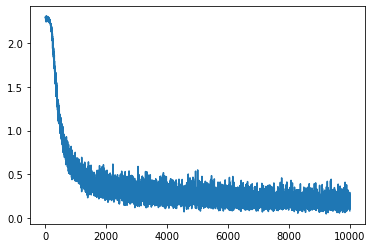

In [9]:
plt.plot(train_loss_list)
plt.show()

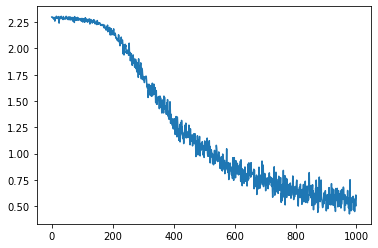

In [10]:
plt.plot(train_loss_list[:1000])
plt.show()

### 4.5.3 시험 데이터로 평가하기

i = 0 | train acc, test acc | 0.1125, 0.1135
i = 600 | train acc, test acc | 0.7772666666666667, 0.7815
i = 1200 | train acc, test acc | 0.8750333333333333, 0.8806
i = 1800 | train acc, test acc | 0.8987333333333334, 0.899
i = 2400 | train acc, test acc | 0.9082333333333333, 0.9103
i = 3000 | train acc, test acc | 0.91515, 0.9172
i = 3600 | train acc, test acc | 0.9202833333333333, 0.9229
i = 4200 | train acc, test acc | 0.9251666666666667, 0.927
i = 4800 | train acc, test acc | 0.9284, 0.9293
i = 5400 | train acc, test acc | 0.9314166666666667, 0.932
i = 6000 | train acc, test acc | 0.9337333333333333, 0.9346
i = 6600 | train acc, test acc | 0.9364333333333333, 0.9368
i = 7200 | train acc, test acc | 0.9396666666666667, 0.9403
i = 7800 | train acc, test acc | 0.9405, 0.9417
i = 8400 | train acc, test acc | 0.9426666666666667, 0.9425
i = 9000 | train acc, test acc | 0.94555, 0.9449
i = 9600 | train acc, test acc | 0.9469166666666666, 0.9458


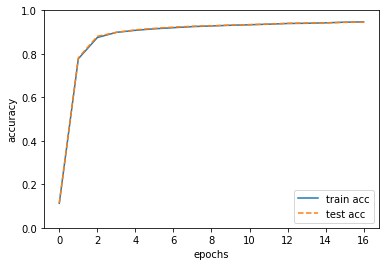

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

twolayernet = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼 파라미터
iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복수
iter_per_epoch = max(train_size / batch_size, 1)
# 1 에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당합니다.
# 예컨데 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 
# 확률적 경사하강법을 100회 반복하면 모든 훈련 데이터를 소진하게 됩니다.
# 이 경우 100회가 1 에폭이 됩니다.

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = twolayernet.numerical_gradient(x_batch, t_batch)
    grad = twolayernet.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        twolayernet.params[key] -= learning_rate * grad[key]
    
    # 학습경과 기록
    loss = twolayernet.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = twolayernet.accuracy(x_train, t_train)
        test_acc = twolayernet.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("i = " + str(i) + " | train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Overfiting(과적합): 훈련 데이터에 포함된 이미지만 제대로 구분하고, 테스트 데이터 등 다른 이미지는 잘 구분해 내지 못하는 현상

- 위의 예제는 오버피팅 없이 훈련 데이터와 테스트 데이터에 모두 잘 동작하고 있음

### 눈으로 확인하기

**실습문제**: 아래 그림과 같이 TwoLayerNet이 잘 동작하는지 테스트 데이터에서 무작위로 10개를 추출하여 prediction 한 결과를 눈으로 확인하는 프로그램을 작성하시오.

test_mask =  [3243   39 6839 8638 5004  297 1656 7427 1132 4441]
y = 0            1            8            7            4            0            2            6            2            6            t = 0            1            8            7            4            0            2            6            2            6            

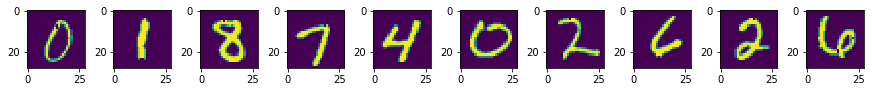

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline  

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    imshow(np.asarray(pil_img)) 

test_size = x_test.shape[0]
test_mask = np.random.choice(test_size, 10)
print("test_mask = ", test_mask)

x = x_test[test_mask]
t = t_test[test_mask]
y = twolayernet.predict(x)

y = np.argmax(y, axis=1)
t = np.argmax(t, axis=1)

print("y =", end=" ")
for i in range(10):
    label = y[i]
    print(label, end="            ") 

print("t =", end=" ")
for i in range(10):
    label = t[i]
    print(label, end="            ") 
        
plt.figure(figsize=(15, 2)) 
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    img = x[i]*256  
    img = img.reshape(28, 28)  
    img_show(img)
plt.show()  